In [1]:
from datetime import datetime, timezone
import pytz

utc_dt = datetime.now(timezone.utc) # UTC time
dt = utc_dt.astimezone()
tz = pytz.timezone('Europe/Berlin')
berlin_now = datetime.now(tz)
print(berlin_now)

2023-05-08 16:02:00.377872+02:00


# 0. import libraries, general settings

In [2]:
# first mute future warnings and only then import pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import scipy
import pandas as pd
import os
import Bio
import scanpy as sc
import csv

from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
from tqdm import tqdm

# 1. import untargeted metabolomic results and create boxplots

In [3]:
metabolomics = pd.read_csv('../data/metabolomics/targeted_metabolomics_ROS.csv')

In [6]:
#separate negative and positive mope
pos_mode = metabolomics[metabolomics['mode'] == 'positive']
neg_mode = metabolomics[metabolomics['mode'] == 'negative']

/tmp/ipykernel_374/2073186450.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


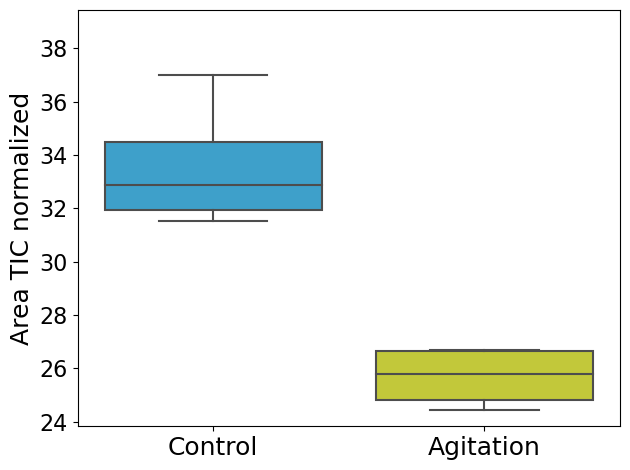

In [31]:
fig, ax = plt.subplots()

labels = ['Control', 'Agitation']
my_pal = {"Ctrl": "#27AAE1", "Shake": "#D7DF23"}

sns.boxplot(data=pos_mode[pos_mode['group'] != 'QC'], x='group', y='area-TICnorm', palette=my_pal)

ax.set_xticklabels(labels, fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Area TIC normalized', fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

max_ylim = pos_mode["area-TICnorm"].max()
new_ylim = (ax.get_ylim()[0], max_ylim * 1.02)
ax.set_ylim(new_ylim)

plt.tight_layout()
plt.savefig('../paper/figures/fig4/metabolomics_pyridoxamine.svg')

In [24]:
neg_mode

mode   sampe  group   metabolite  area-TICnorm
13  negative   Ctrl1   Ctrl  hypotaurine       11.4879
14  negative   Ctrl2   Ctrl  hypotaurine        9.9331
15  negative   Ctrl3   Ctrl  hypotaurine        8.3434
16  negative   Ctrl4   Ctrl  hypotaurine        9.3369
17  negative    QC02     QC  hypotaurine        7.3001
18  negative    QC03     QC  hypotaurine        8.6559
19  negative    QC04     QC  hypotaurine        8.3396
20  negative    QC05     QC  hypotaurine        8.8586
21  negative    QC06     QC  hypotaurine        9.4052
22  negative  Shake1  Shake  hypotaurine        7.3385
23  negative  Shake2  Shake  hypotaurine        7.9135
24  negative  Shake3  Shake  hypotaurine        6.6441
25  negative  Shake4  Shake  hypotaurine        5.9523

/tmp/ipykernel_374/316814201.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


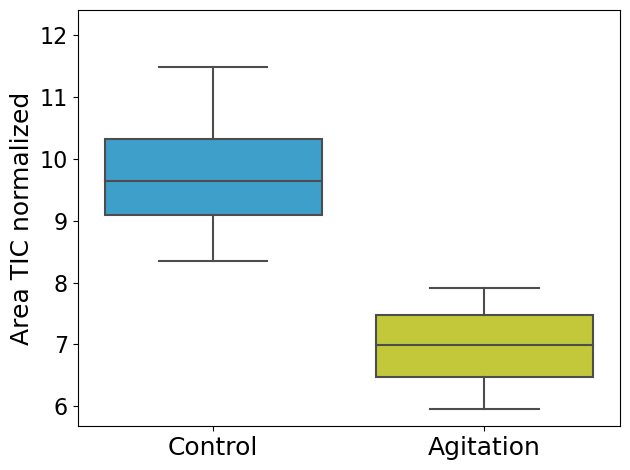

In [32]:
fig, ax = plt.subplots()

labels = ['Control', 'Agitation']
my_pal = {"Ctrl": "#27AAE1", "Shake": "#D7DF23"}

sns.boxplot(data=neg_mode[neg_mode['group'] != 'QC'], x='group', y='area-TICnorm', palette=my_pal)

ax.set_xticklabels(labels, fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Area TIC normalized', fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

max_ylim = neg_mode["area-TICnorm"].max()
new_ylim = (ax.get_ylim()[0], max_ylim * 1.08)
ax.set_ylim(new_ylim)

plt.tight_layout()
plt.savefig('../paper/figures/fig4/metabolomics_hypotaurine.svg')